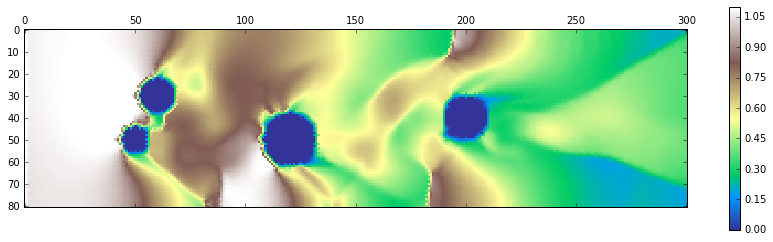

In [12]:
# from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
# init_notebook_mode()
import pandas as pd
from scipy.interpolate import griddata
import matplotlib.pyplot as plt
import numpy as np

# import plotly.plotly as py
# import plotly.graph_objs as go

from anuga.file import netcdf
%matplotlib inline

swwFile = 'poles_videos/poles.sww'
timeslice = -1


fid = netcdf.NetCDFFile(swwFile)

x = fid.variables['x'][:]
y = fid.variables['y'][:]
elev = fid.variables['elevation'][:]
stage = fid.variables['stage'][:]

try:
    conc = fid.variables['concentration'][:]
except:
    pass

fid.close()



plotter = stage - elev




# create 1D-arrays from the 2D-arrays
xyz = {'x': x, 'y': y, 'z': plotter[0]}

# put the data into a pandas DataFrame (this is what my data looks like)
df = pd.DataFrame(xyz, index=range(len(xyz['x']))) 

# re-create the 2D-arrays
x1 = np.linspace(df['x'].min(), df['x'].max(), len(df['x'].unique()))
y1 = np.linspace(df['y'].min(), df['y'].max(), len(df['y'].unique()))
x2, y2 = np.meshgrid(x1, y1)

for i in [len(elev)-1]:#range(0,len(elev)):


    # create 1D-arrays from the 2D-arrays
    xyz = {'x': x, 'y': y, 'z': plotter[i]}

    # put the data into a pandas DataFrame (this is what my data looks like)
    df = pd.DataFrame(xyz, index=range(len(xyz['x']))) 

    z2 = griddata((df['x'], df['y']), df['z'], (x2, y2), method='linear')


#     iplot({'data': data},show_link=False)
#     py.image.save_as({'data': data}, 'images/new_conc_' + str(i) + '.png')
    plt.matshow(z2, cmap='terrain')
    plt.colorbar()
    plt.clim(0,1.1)
#     plt.savefig('no_poles_videos/images/depth_' + str(i) + '.png')
    plt.show()

In [19]:
plt.scatter(x[x < 1 & y < 1],y[x < 1 & y < 1])

TypeError: ufunc 'bitwise_and' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [31]:
x[35:50]

array([ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0.1,  0.1,  0.1,  0.1,  0.1,
        0.1,  0.1,  0.1,  0.1], dtype=float32)

In [32]:
y[35:50]

array([ 3.5       ,  3.5999999 ,  3.70000005,  3.79999995,  3.9000001 ,
        4.        ,  0.        ,  0.1       ,  0.2       ,  0.30000001,
        0.40000001,  0.5       ,  0.60000002,  0.69999999,  0.80000001], dtype=float32)

In [22]:
x2

array([[  0.  ,   0.05,   0.1 , ...,  14.9 ,  14.95,  15.  ],
       [  0.  ,   0.05,   0.1 , ...,  14.9 ,  14.95,  15.  ],
       [  0.  ,   0.05,   0.1 , ...,  14.9 ,  14.95,  15.  ],
       ..., 
       [  0.  ,   0.05,   0.1 , ...,  14.9 ,  14.95,  15.  ],
       [  0.  ,   0.05,   0.1 , ...,  14.9 ,  14.95,  15.  ],
       [  0.  ,   0.05,   0.1 , ...,  14.9 ,  14.95,  15.  ]])

In [21]:
y2

array([[ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.05,  0.05,  0.05, ...,  0.05,  0.05,  0.05],
       [ 0.1 ,  0.1 ,  0.1 , ...,  0.1 ,  0.1 ,  0.1 ],
       ..., 
       [ 3.9 ,  3.9 ,  3.9 , ...,  3.9 ,  3.9 ,  3.9 ],
       [ 3.95,  3.95,  3.95, ...,  3.95,  3.95,  3.95],
       [ 4.  ,  4.  ,  4.  , ...,  4.  ,  4.  ,  4.  ]])

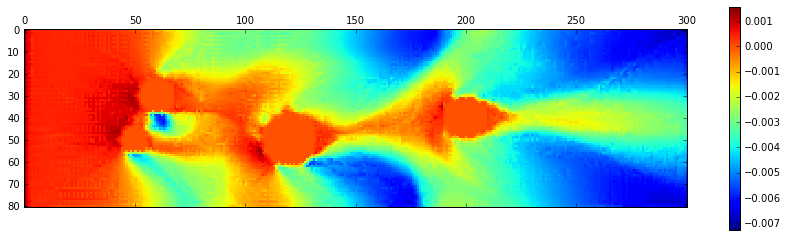

In [147]:
xyz = {'x': x, 'y': y, 'z': elev[-1]-elev[0]}

# put the data into a pandas DataFrame (this is what my data looks like)
df = pd.DataFrame(xyz, index=range(len(xyz['x']))) 

z2 = griddata((df['x'], df['y']), df['z'], (x2, y2), method='linear')

data = [
    go.Heatmap(
        z=z2, colorscale='YIGnBu'
    )
]

# iplot({'data': data},show_link=False)
#     py.image.save_as({'data': data}, 'images/new_conc_' + str(i) + '.png')
plt.matshow(z2)
plt.colorbar()
plt.show()

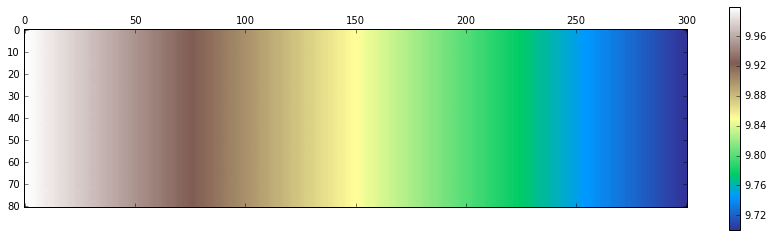

In [167]:
xyz = {'x': x, 'y': y, 'z': elev[0]}

# put the data into a pandas DataFrame (this is what my data looks like)
df = pd.DataFrame(xyz, index=range(len(xyz['x']))) 

z2 = griddata((df['x'], df['y']), df['z'], (x2, y2), method='linear')

data = [
    go.Heatmap(
        z=z2, colorscale='YIGnBu'
    )
]

# iplot({'data': data},show_link=False)
#     py.image.save_as({'data': data}, 'images/new_conc_' + str(i) + '.png')
plt.matshow(z2, cmap='terrain')
plt.colorbar()
# plt.clim(10.05,14.44)
plt.savefig('no_poles_videos/images/no_poles_elev.png')
plt.show()

In [168]:
conc.shape

(41, 12191)